In [19]:
# auto_mpg_v2.csv 데이터 읽어오기
# train 80%, test 30%로 구분하여 조회
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('./file_new/auto_mpg_v2.csv')
df

,mpg,cylinders,displacement,horspower,weight,acceleraration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [39]:
# 예측모델
x = ndf[['weight']]
y = ndf['mpg']

In [40]:
x_train, x_test, y_train,y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)

In [41]:
# 선형회귀분석 모델
from sklearn.model_selection import train_test_split

In [42]:
# 다항식으로 변환하는 모델(2차원으로 변환해요 사용)
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree = 2)

In [44]:
x_train_poly = poly.fit_transform(x_train)

In [45]:
x_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [46]:
# 결정계수 확인
pr = LinearRegression()

In [47]:
# 예측
pr.fit(x_train_poly, y_train)

LinearRegression()

In [48]:
# 검증
x_test_poly = poly.fit_transform(x_test)

In [49]:
# 학습시킨 모델에 검증 데이터를 넣어서 결정계수 확인하기
pr.score(x_test_poly, y_test)

0.7087009262975685

In [50]:
y_hat_test = pr.predict(x_test_poly)

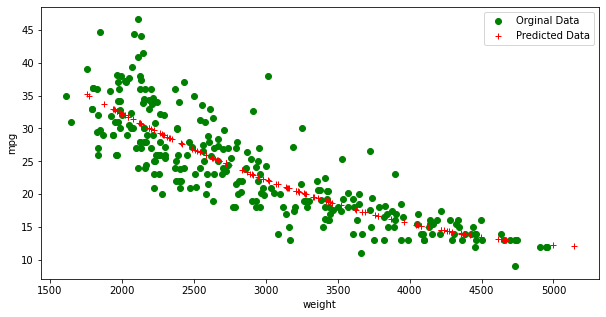

In [54]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train, y_train, "go", label = "Orginal Data")
ax.plot(x_test, y_hat_test, "r+", label = "Predicted Data")

ax.legend(loc = 'best')

plt.xlabel('weight')
plt.ylabel('mpg')

plt.show()

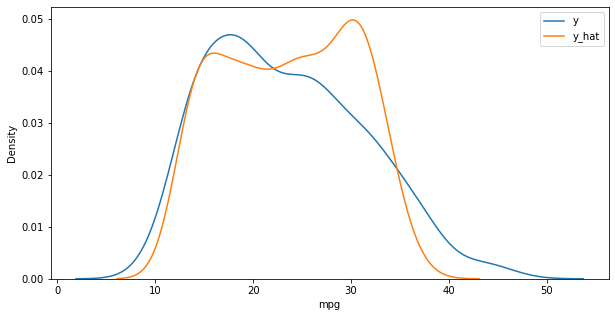

In [60]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

fig = plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y, label ="y")
ax2 = sns.kdeplot(y_hat, label ="y_hat",ax=ax1)

plt.legend()
plt.show()